In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard_2023.csv to creditcard_2023.csv


XGBoost : extreme gradient Boosted tree-algorithm  : Supervised ML algorithm particularly for tabular data, L1 and L2 regularization, missing value replacement, inbuilt cross-validation, parallelization, tree-pruning, versatility (user defined objective functions).

We acknowledge the guidance from the video of Richard Ball on youtube and some ideas from : https://github.com/Abhishek004-thapa/Credit-Card-Fraud-Detection/blob/main/XGBoost_model.ipynb, although it seems to me the datasets I am using is different from both of theirs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns # plotting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
#from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import xgboost as xgb
#from sklearn.linear_model import LogisticRegression
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('creditcard_2023.csv')

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
y = df['Class']
X = df.drop(['Class','Amount'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



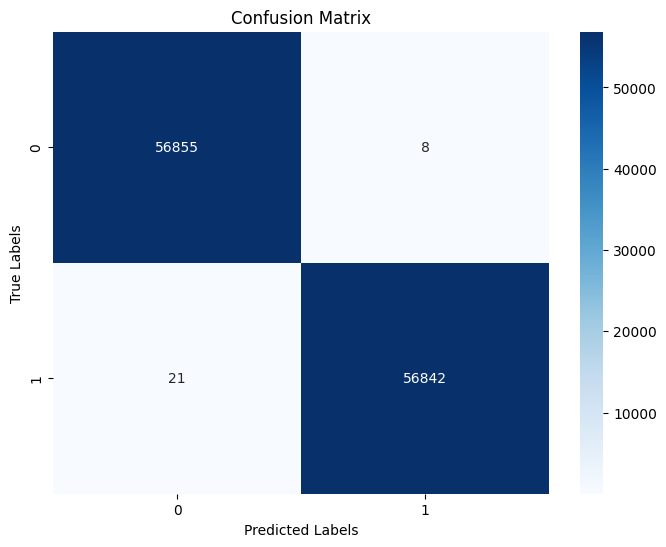

In [ ]:
plt.figure(figsize =(8,6))
cm = confusion_matrix(y_test, y_pred) #how often predicted labels match the true labels
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues') #format annotation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#true positives are also less than that in the video (56,678), which is also expected given we have cut down the training data
#still room to improve, getting some false positive and false negative
#improvement could be done by hyper parameter tuning, inside the XGBoost, especially important for

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) #what is the roc curve?, have not used this before
#requires predicted probability
roc_auc = auc(fpr, tpr)  #, auc = area under the curve, perfect model has the auc = 1, random classifier has auc of 0.5
#false positive rate, incorrectly predicted, labels, these seem to be really important in this kind of classification particularly for credit card fraud
#tpr : true positive rate : precision

Perfect ROC and AUC curve

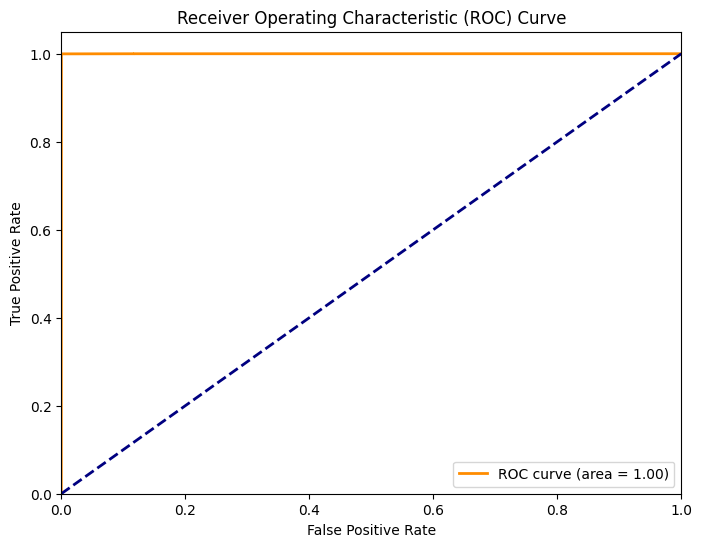

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Let's try the more imbalaced dataset, note that this dataset like the other is also not anonymized

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


In [ ]:
import xgboost as xgb

In [ ]:
df_app = pd.read_csv('application_data.csv')

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
non_numeric_cols = X_train.select_dtypes(exclude=['number', 'bool']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
#'TARGET' is my fraud indicator (1 = fraud/default)
class_counts = df_app['TARGET'].value_counts()
print("Class distribution:")
print(class_counts)
print("Percentage breakdown:")
print(df_app['TARGET'].value_counts(normalize=True) * 100)

Class distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Percentage breakdown:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [ ]:
y = df_app['TARGET']
X = df_app.drop(['TARGET', 'SK_ID_CURR'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

XGBoost requires numeric or category dtypes only — and object/string dtypes are not allowed unless handled properly.One-Hot Encoding converts each categorical column into a set of new binary columns, one for each unique category. example for the gender category

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align train/test columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Then fit model
model_app = xgb.XGBClassifier(scale_pos_weight=100, eval_metric='logloss')
#scale_pos_weight tells XGBoost to "pay more attention to the positive class (class 1)" during training. This can be used because we are not using SMOTE for class balancing
model_app.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_app.predict(X_test_encoded)

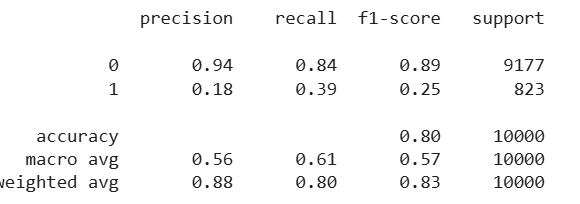, this is for comparison with when we did with SMOTE on the same dataset in the other notebook with SMOTE + random Forest

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.24      0.38     56538
           1       0.10      0.93      0.17      4965

    accuracy                           0.29     61503
   macro avg       0.53      0.58      0.28     61503
weighted avg       0.90      0.29      0.37     61503



In [ ]:
confusion_matrix(y_test,y_pred)

array([[13504, 43034],
       [  369,  4596]])

             
      0       | 13504  | 43034   → False Positives (way too many)
      1       |   369  |  4596   → True Positives (only this is good)

High False Positives (43k): model is flagging a huge number of legitimate cases as fraud (annoyed customers).

Some False Negatives (369): model is missing actual fraud cases, which is worse in terms of financial loss.

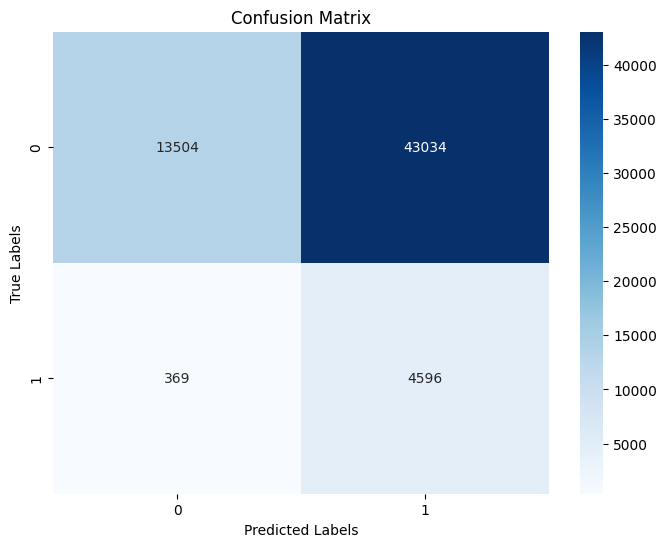

In [ ]:
plt.figure(figsize =(8,6))
cm = confusion_matrix(y_test, y_pred) #how often predicted labels match the true labels
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues') #format annotation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#bad job done

I also read that using correct threshold is important for XG boost especially when it is dealing with imbalanced datasets,

https://xgboosting.com/xgboost-threshold-moving-for-imbalanced-classification/

Class 0: 226148, Class 1: 19860, scale_pos_weight: 11.39


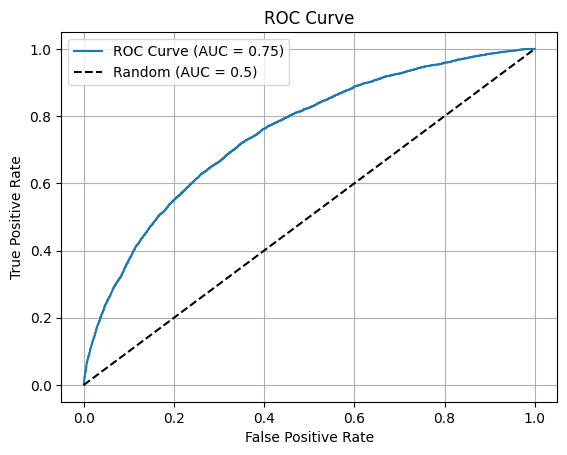

Confusion Matrix:
[[ 6709 49829]
 [   92  4873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.12      0.21     56538
           1       0.09      0.98      0.16      4965

    accuracy                           0.19     61503
   macro avg       0.54      0.55      0.19     61503
weighted avg       0.91      0.19      0.21     61503



In [ ]:
# 1. Load and split features/target
y = df_app['TARGET']
X = df_app.drop(['TARGET', 'SK_ID_CURR'], axis=1)

# 2. One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# 3. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Align train/test (ensure matching columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 5. Compute scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Class 0: {neg}, Class 1: {pos}, scale_pos_weight: {scale_pos_weight:.2f}")

# 6. Train XGBoost model
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 7. Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 8. ROC curve & threshold tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 9. Choose a better threshold (e.g., 0.1, 0.3 instead of 0.5)
threshold = 0.1
y_pred = (y_pred_proba > threshold).astype(int)

# 10. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, balanced_accuracy_score

Using the same code that we have for the synthetic dataset but instead using it for this dataset. Problem with the threshold, how it was done for the synthetic dataset. Does it really improve? Only slightly maybe. I think them using SMOTE is the best way. Maybe SMOTE + Random Forest

We can also try SMOTE + XGBoost

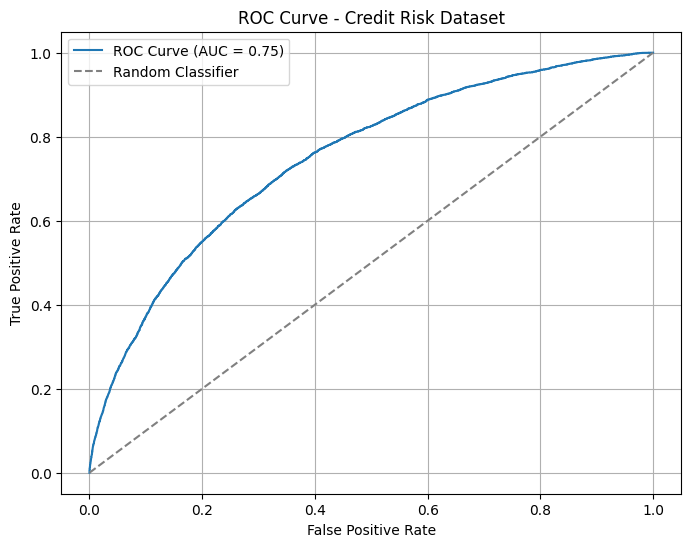

Optimal Threshold: 0.65
Confusion Matrix:
[[49948  6590]
 [ 2914  2051]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     56538
           1       0.24      0.41      0.30      4965

    accuracy                           0.85     61503
   macro avg       0.59      0.65      0.61     61503
weighted avg       0.89      0.85      0.86     61503



In [ ]:
y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]  # from the application dataset
# 2. Evaluate metrics for multiple thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

def evaluate_threshold(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int) #Applies exactly one threshold at a time, returns one precision, recall, F1, and balanced accuracy
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    return precision, recall, f1, balanced_acc



metrics = [evaluate_threshold(y_test, y_pred_proba, t) for t in thresholds]
precision, recall, f1, balanced_accuracy = zip(*metrics)

# 3. Plot AUC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Risk Dataset")
plt.legend()
plt.grid(True)
plt.show()

# 4. Find best threshold by F1
def find_optimal_threshold(y_true, y_proba, metric='f1'):
    thresholds = np.arange(0.1, 1.0, 0.01)
    metrics = [evaluate_threshold(y_true, y_proba, t) for t in thresholds]
    if metric == 'f1':
        idx = np.argmax([f1 for _, _, f1, _ in metrics])
    elif metric == 'balanced_accuracy':
        idx = np.argmax([ba for _, _, _, ba in metrics])
    return thresholds[idx]

optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, metric='f1')

# 5. Final predictions + evaluation
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
